In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re 
import time
import cv2
import matplotlib.pyplot as plt

In [21]:
base_url = "https://www.scrapethissite.com/pages/frames/"
outer_url = base_url + "/pages/frames/"

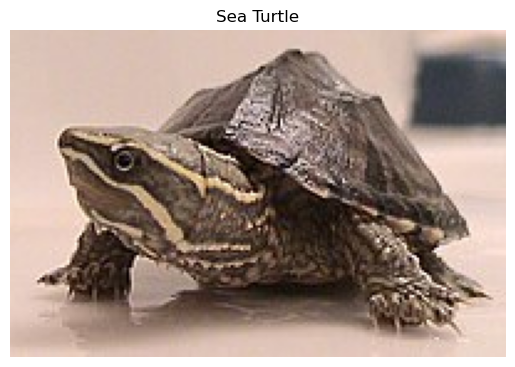

In [24]:

img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/Sternotherus_odoratus.jpg/200px-Sternotherus_odoratus.jpg"
response = requests.get(img_url)
if response.status_code == 200:
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    cv2.imwrite("sea_turtle.jpg", image)

    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title("Sea Turtle")
    plt.axis('off')
    plt.show()
else:
    print("Failed to download image.")


In [27]:
image_original = cv2.imread('sea_turtle.jpg')

In [26]:
def plot_image(image_1, image_2, title_1="Original", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1, cmap="gray" if len(image_1.shape)==2 else None)
    plt.title(title_1)
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(image_2, cmap="gray" if len(image_2.shape)==2 else None)
    plt.title(title_2)
    plt.axis("off")
    plt.show()

In [28]:
hist = cv2.calcHist([image_original],[0],None,[256],[0,255])
hist

array([[241.],
       [ 26.],
       [ 22.],
       [ 37.],
       [ 27.],
       [ 29.],
       [ 39.],
       [ 62.],
       [ 45.],
       [ 56.],
       [ 66.],
       [ 70.],
       [ 77.],
       [ 93.],
       [ 90.],
       [ 92.],
       [ 95.],
       [101.],
       [108.],
       [112.],
       [113.],
       [105.],
       [117.],
       [127.],
       [125.],
       [113.],
       [102.],
       [112.],
       [102.],
       [116.],
       [119.],
       [111.],
       [ 99.],
       [112.],
       [108.],
       [ 98.],
       [108.],
       [117.],
       [107.],
       [112.],
       [113.],
       [104.],
       [107.],
       [100.],
       [ 93.],
       [103.],
       [110.],
       [ 96.],
       [120.],
       [101.],
       [ 91.],
       [122.],
       [112.],
       [ 95.],
       [ 98.],
       [115.],
       [102.],
       [ 95.],
       [105.],
       [107.],
       [ 84.],
       [ 99.],
       [134.],
       [118.],
       [124.],
       [123.],
       [13

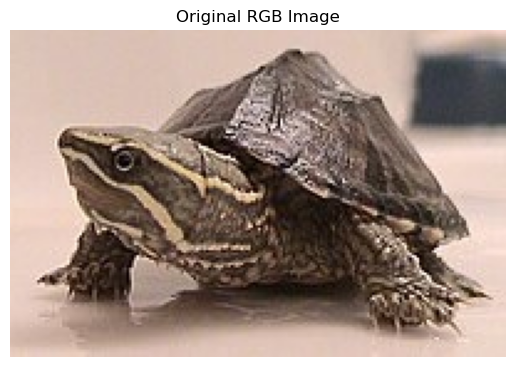

In [29]:
image_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

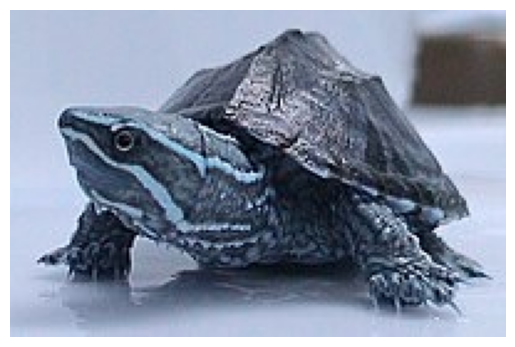

In [30]:
plt.imshow(image_original)
plt.axis('off')
plt.show()

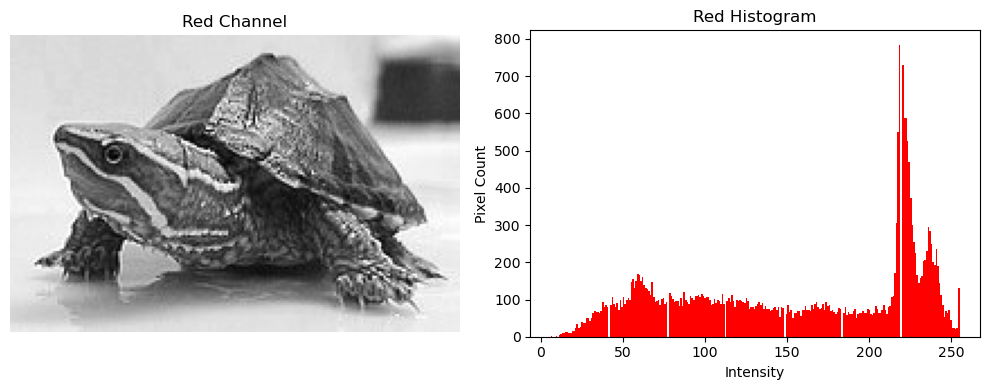

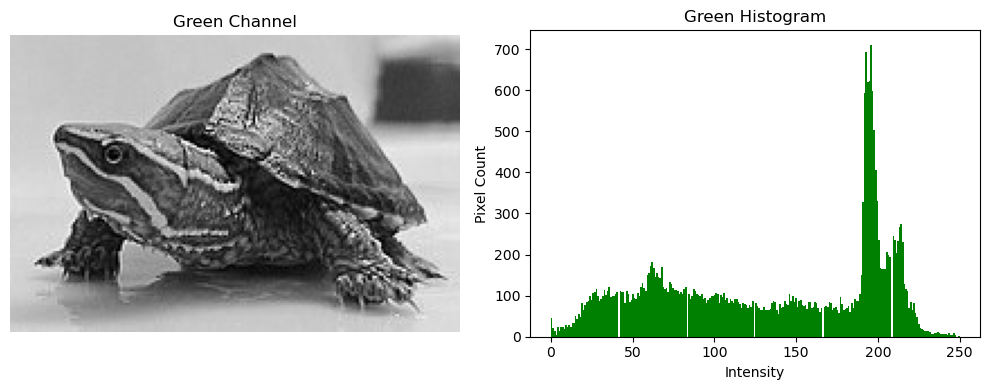

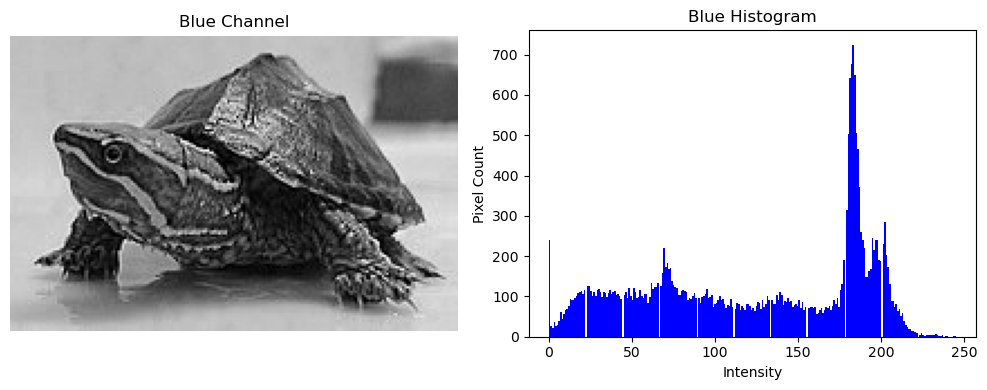

In [31]:
channels = ['Red', 'Green', 'Blue']
for i, color in enumerate(channels):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(image_rgb[:,:,i], cmap='gray')
    plt.title(f'{color} Channel')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.hist(image_rgb[:,:,i].ravel(), bins=256, color=color.lower())
    plt.title(f'{color} Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')
    plt.tight_layout()
    plt.show()

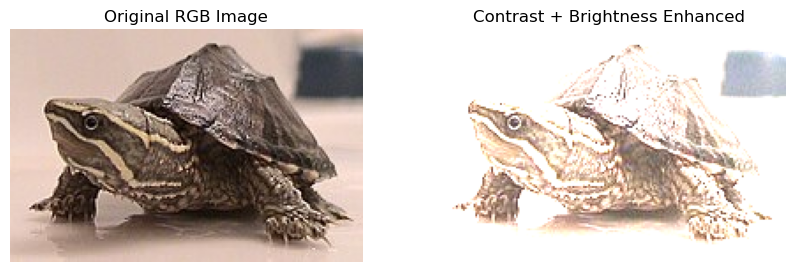

In [32]:
alpha = 2  
beta = 70    


image_transformed = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)


plot_image(image_rgb, image_transformed, "Original RGB Image", "Contrast + Brightness Enhanced")

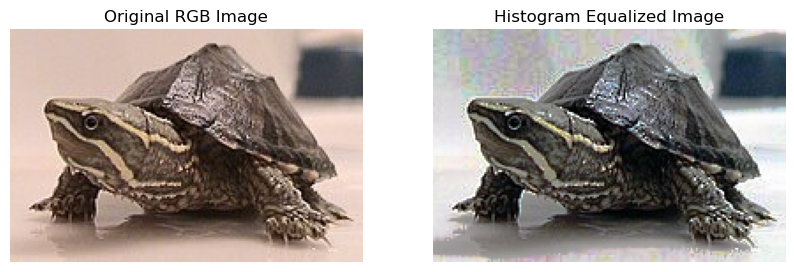

In [33]:

equalized_channels = []
for i in range(3):
    equalized = cv2.equalizeHist(image_rgb[:,:,i])
    equalized_channels.append(equalized)


image_equalized = cv2.merge(equalized_channels)


plot_image(image_rgb, image_equalized, "Original RGB Image", "Histogram Equalized Image")

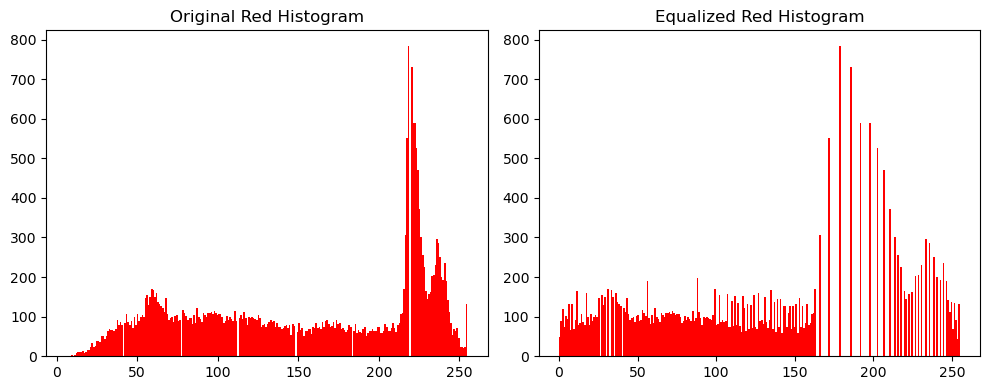

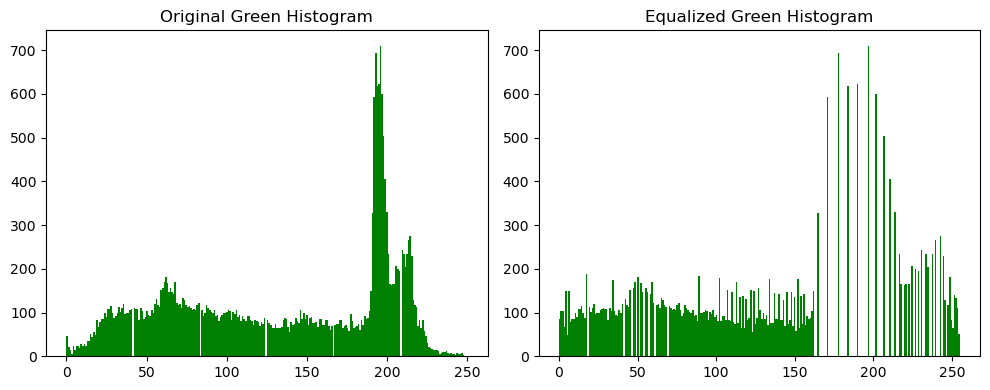

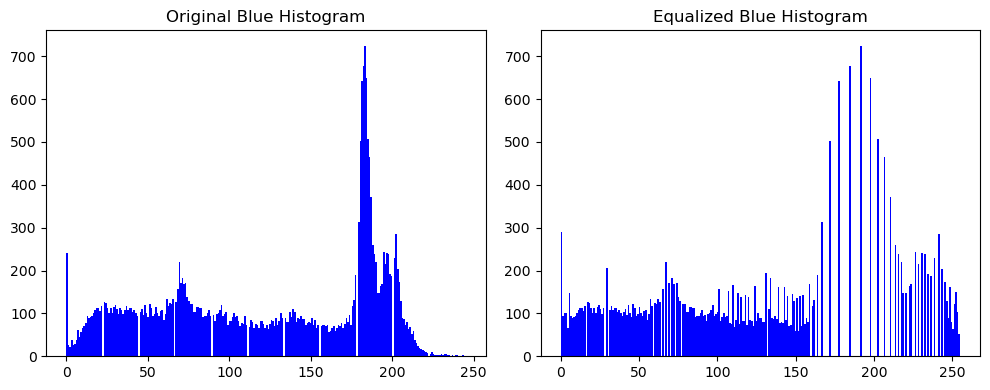

In [34]:
for i, color in enumerate(channels):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(image_rgb[:,:,i].ravel(), bins=256, color=color.lower())
    plt.title(f'Original {color} Histogram')
    plt.subplot(1,2,2)
    plt.hist(equalized_channels[i].ravel(), bins=256, color=color.lower())
    plt.title(f'Equalized {color} Histogram')
    plt.tight_layout()
    plt.show()

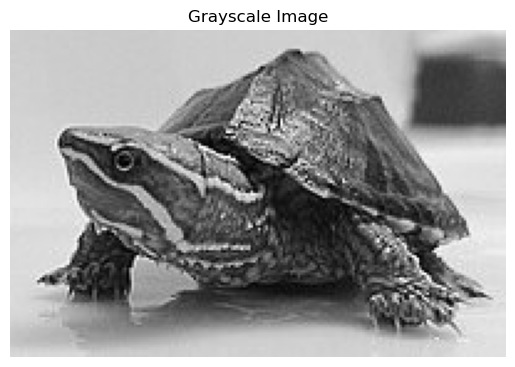

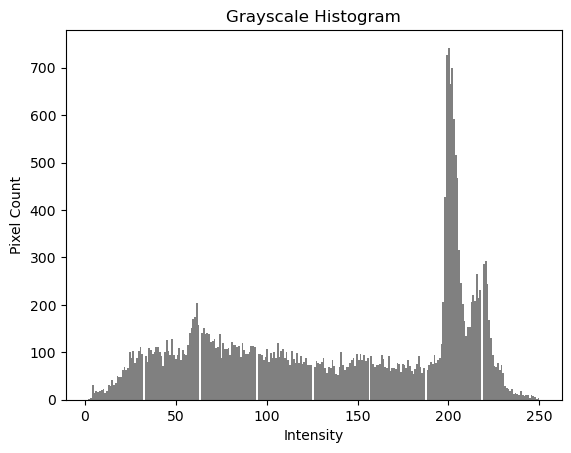

In [35]:

gray_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)


plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


plt.hist(gray_image.ravel(), bins=256, color='gray')
plt.title("Grayscale Histogram")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")
plt.show()

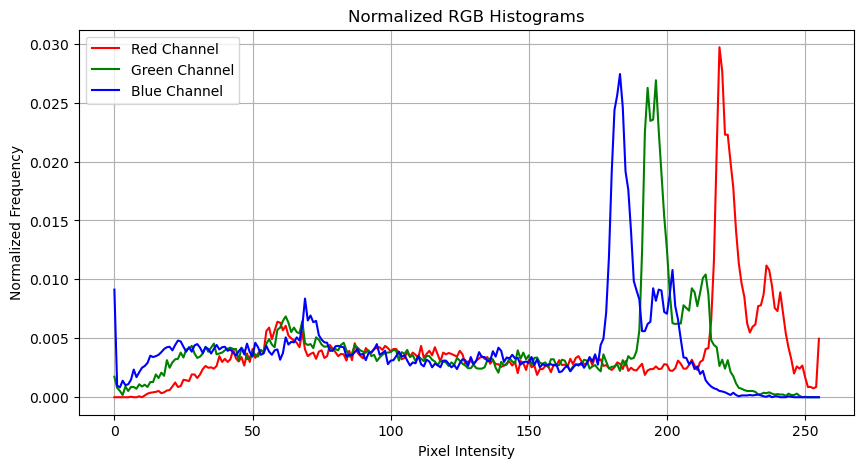

In [37]:
# Split into channels
r_channel = image_rgb[:, :, 0]
g_channel = image_rgb[:, :, 1]
b_channel = image_rgb[:, :, 2]

r_hist = cv2.calcHist([r_channel], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([g_channel], [0], None, [256], [0, 256])
b_hist = cv2.calcHist([b_channel], [0], None, [256], [0, 256])

r_hist /= r_hist.sum()
g_hist /= g_hist.sum()
b_hist /= b_hist.sum()

# Plot all three on one graph
plt.figure(figsize=(10, 5))
plt.plot(r_hist, color='red', label='Red Channel')
plt.plot(g_hist, color='green', label='Green Channel')
plt.plot(b_hist, color='blue', label='Blue Channel')
plt.title("Normalized RGB Histograms")
plt.xlabel("Pixel Intensity")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [38]:
def log_transform(image_rgb):
    image_float = image_rgb.astype(np.float32) + 1 
    c = 255 / np.log(1 + np.max(image_float))
    log_image = c * np.log(image_float)
    log_image = np.clip(log_image, 0, 255).astype(np.uint8)
    return log_image

log_image = log_transform(image_rgb)

In [39]:
def gamma_correction(image_rgb, gamma):
    normalized = image_rgb / 255.0
    corrected = np.power(normalized, gamma)
    corrected = np.clip(corrected * 255, 0, 255).astype(np.uint8)
    return corrected

gamma1 = gamma_correction(image_rgb, 0.5)
gamma2 = gamma_correction(image_rgb, 2.0)

In [40]:
def contrast_stretch(image_rgb):
    in_min = np.min(image_rgb)
    in_max = np.max(image_rgb)
    stretched = (image_rgb - in_min) * (255.0 / (in_max - in_min))
    return np.clip(stretched, 0, 255).astype(np.uint8)

contrast_image = contrast_stretch(image_rgb)

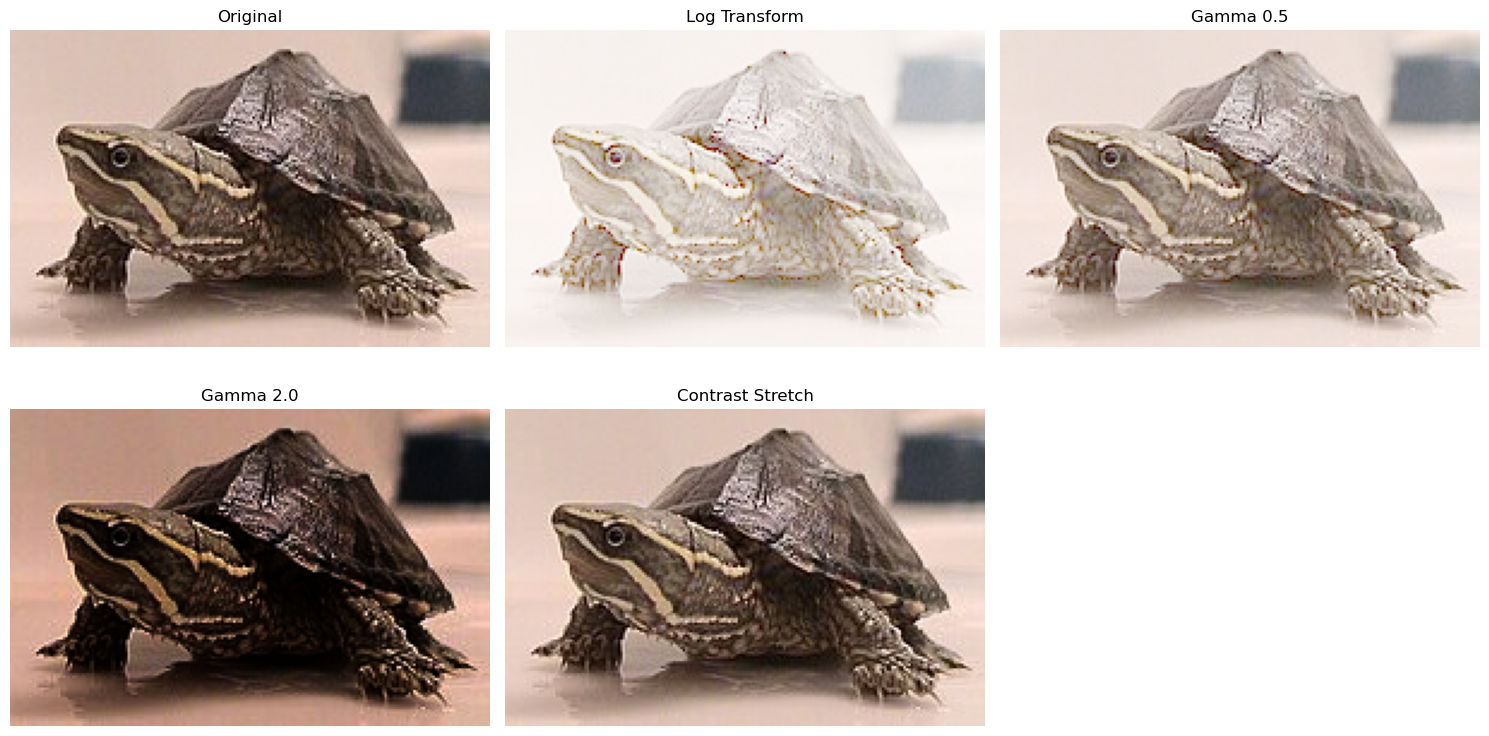

In [41]:
titles = ['Original', 'Log Transform', 'Gamma 0.5', 'Gamma 2.0', 'Contrast Stretch']
images = [image_rgb, log_image, gamma1, gamma2, contrast_image]

plt.figure(figsize=(15, 8))
for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [42]:
def equalize_rgb_channels(image_rgb):
    channels = cv2.split(image_rgb)
    eq_channels = [cv2.equalizeHist(ch) for ch in channels]
    eq_image = cv2.merge(eq_channels)
    return eq_image

eq_rgb = equalize_rgb_channels(image_rgb)

In [43]:
def equalize_y_channel(image_rgb):
    img_ycc = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YCrCb)
    y, cr, cb = cv2.split(img_ycc)
    y_eq = cv2.equalizeHist(y)
    img_ycc_eq = cv2.merge((y_eq, cr, cb))
    img_rgb_eq = cv2.cvtColor(img_ycc_eq, cv2.COLOR_YCrCb2RGB)
    return img_rgb_eq

eq_ycrcb = equalize_y_channel(image_rgb)

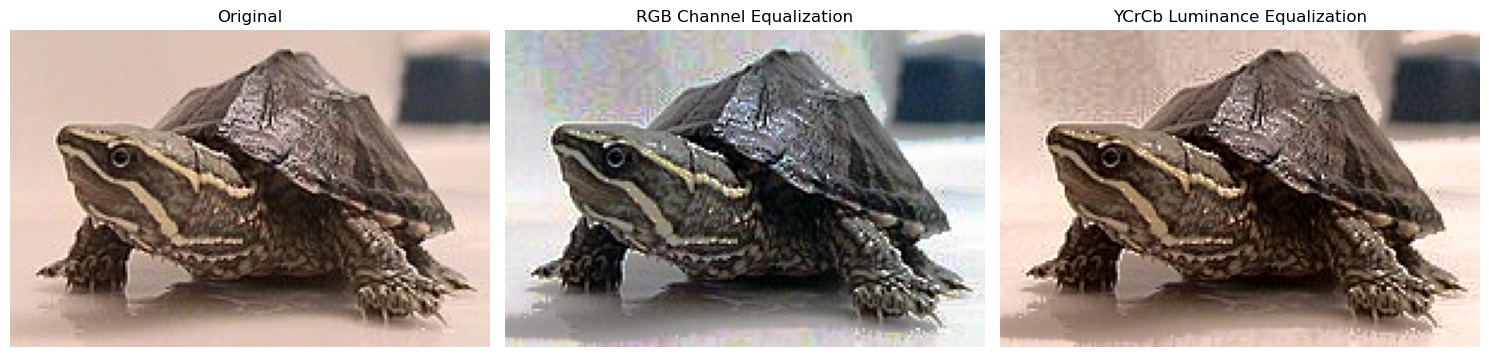

In [44]:
titles = ['Original', 'RGB Channel Equalization', 'YCrCb Luminance Equalization']
images = [image_rgb, eq_rgb, eq_ycrcb]

plt.figure(figsize=(15, 5))
for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [45]:
_, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [48]:
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY,
    blockSize=11,  
    C=2            
)

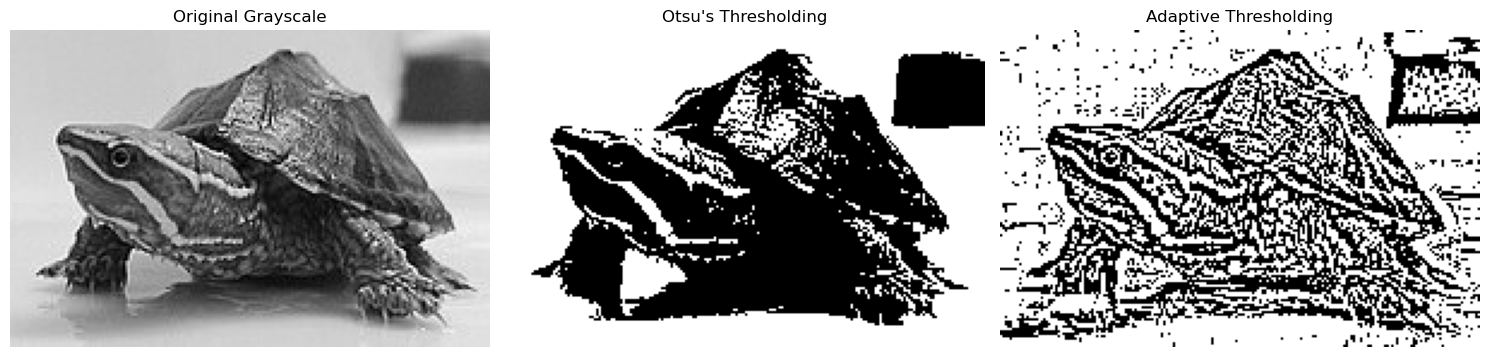

In [50]:
titles = ['Original Grayscale', "Otsu's Thresholding", 'Adaptive Thresholding']
images = [gray_image, otsu_thresh, adaptive_thresh]

plt.figure(figsize=(15, 5))
for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

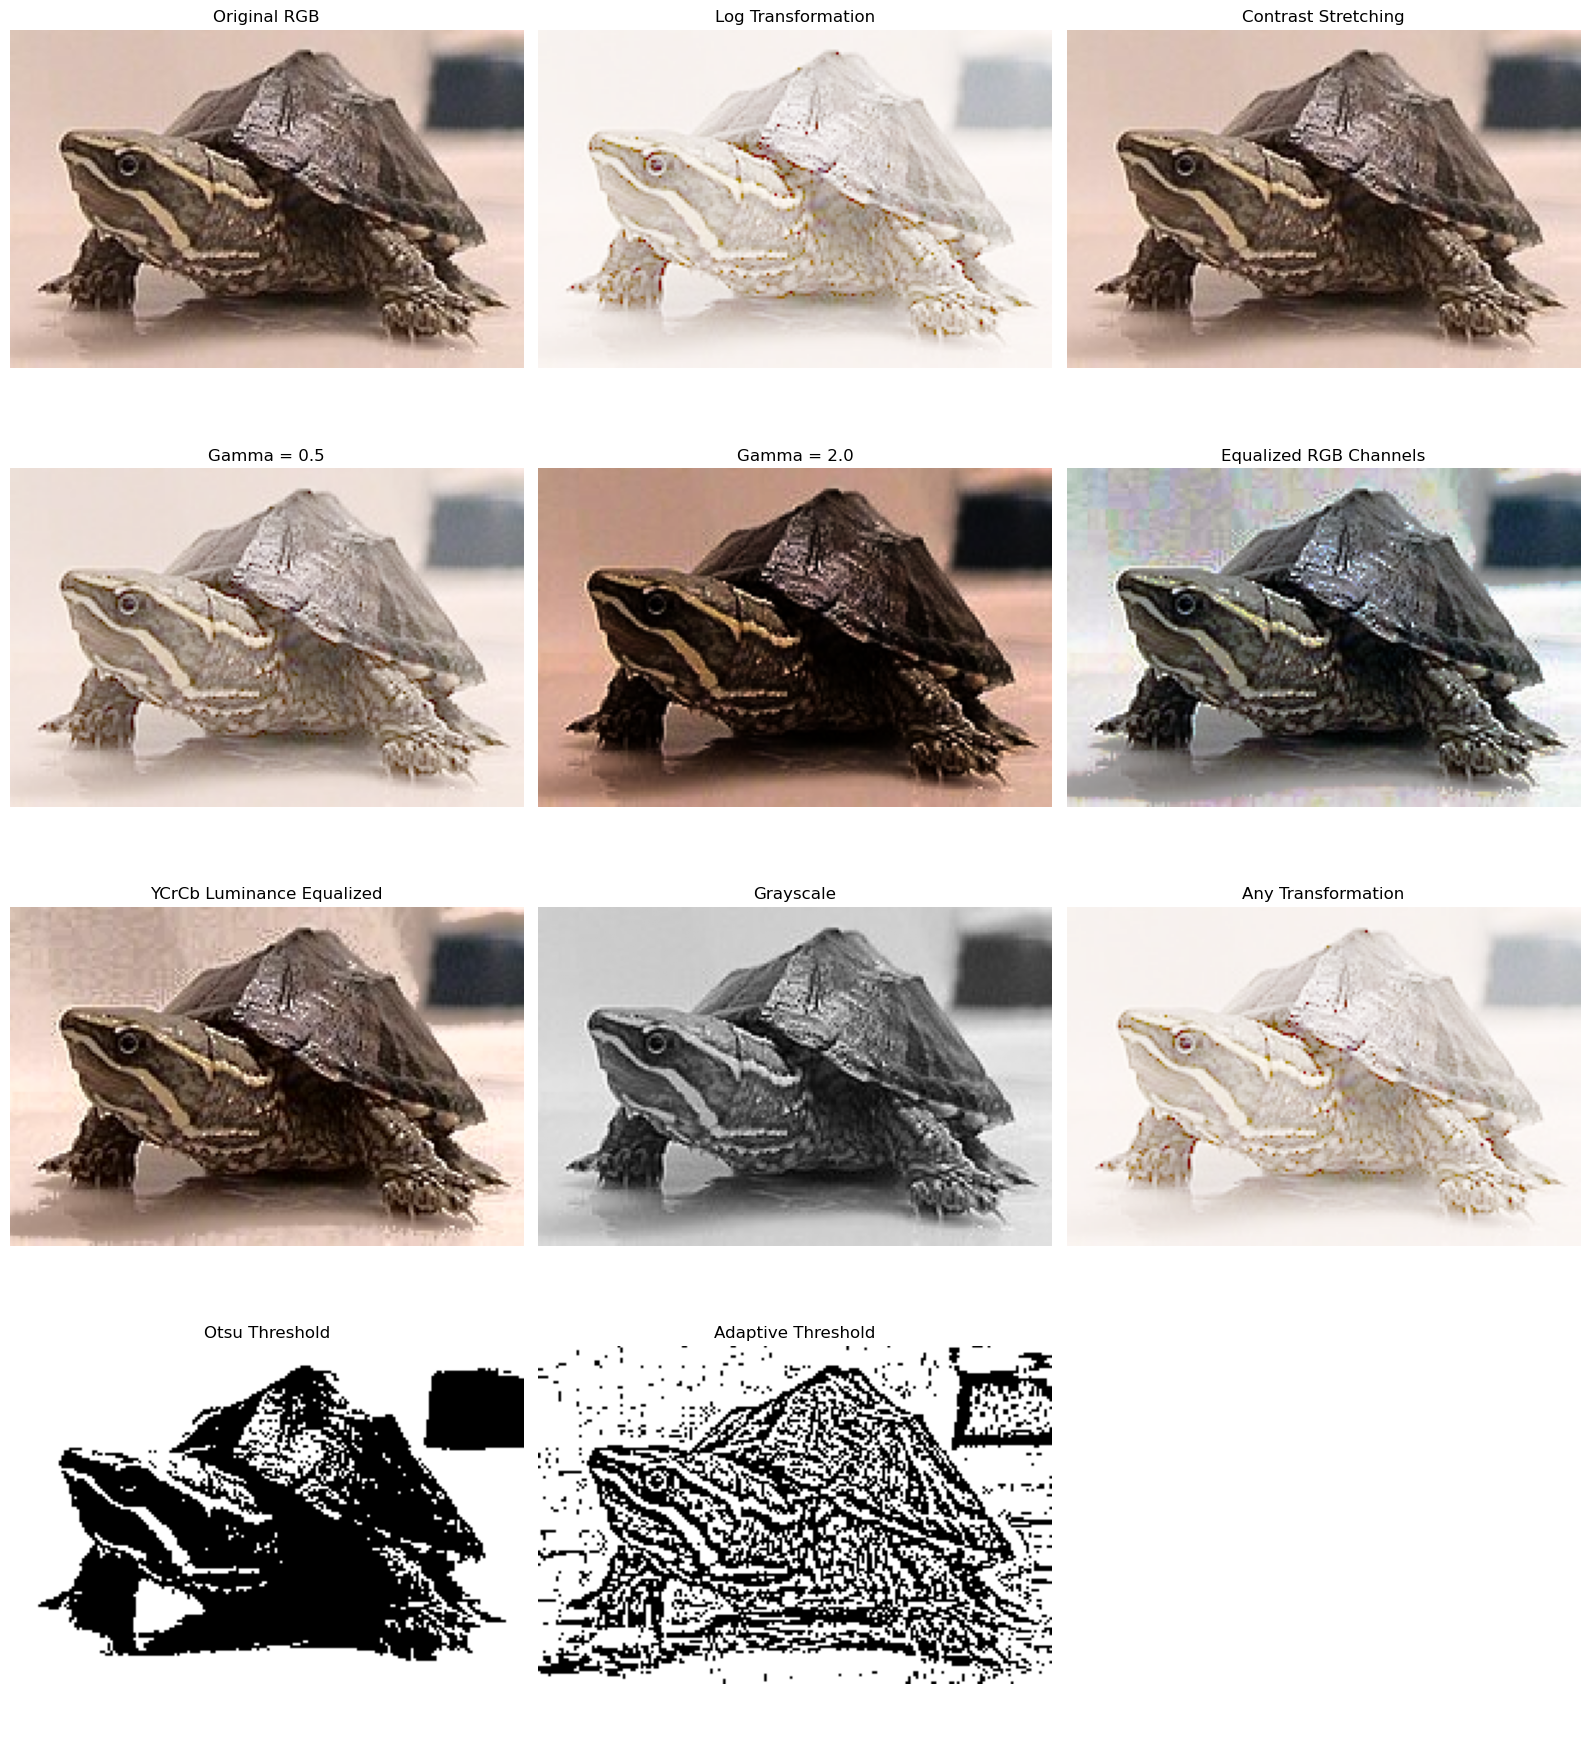

In [51]:
fig, axs = plt.subplots(4, 3, figsize=(16, 18))

# Row 1: Original + Histograms
axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title("Original RGB")
axs[0, 0].axis('off')

axs[0, 1].imshow(log_image)
axs[0, 1].set_title("Log Transformation")
axs[0, 1].axis('off')

axs[0, 2].imshow(contrast_image)
axs[0, 2].set_title("Contrast Stretching")
axs[0, 2].axis('off')

# Row 2: Gamma Correction
axs[1, 0].imshow(gamma1)
axs[1, 0].set_title("Gamma = 0.5")
axs[1, 0].axis('off')

axs[1, 1].imshow(gamma2)
axs[1, 1].set_title("Gamma = 2.0")
axs[1, 1].axis('off')

axs[1, 2].imshow(eq_rgb)
axs[1, 2].set_title("Equalized RGB Channels")
axs[1, 2].axis('off')

# Row 3: YCrCb Equalization + Grayscale
axs[2, 0].imshow(eq_ycrcb)
axs[2, 0].set_title("YCrCb Luminance Equalized")
axs[2, 0].axis('off')

axs[2, 1].imshow(cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY), cmap='gray')
axs[2, 1].set_title("Grayscale")
axs[2, 1].axis('off')

axs[2, 2].imshow(log_image)  # reuse or replace
axs[2, 2].set_title("Any Transformation")
axs[2, 2].axis('off')

# Row 4: Thresholding
axs[3, 0].imshow(otsu_thresh, cmap='gray')
axs[3, 0].set_title("Otsu Threshold")
axs[3, 0].axis('off')

axs[3, 1].imshow(adaptive_thresh, cmap='gray')
axs[3, 1].set_title("Adaptive Threshold")
axs[3, 1].axis('off')

axs[3, 2].axis('off')  # Empty slot

plt.tight_layout()
plt.show()


In [52]:
!pip install ipywidgets

In [54]:
import ipywidgets as widgets
from IPython.display import display

In [55]:
def gamma_correction(image_rgb, gamma):
    normalized = image_rgb / 255.0
    corrected = np.power(normalized, gamma)
    corrected = np.clip(corrected * 255, 0, 255).astype(np.uint8)
    return corrected

In [56]:

def update_gamma(gamma_val):
    gamma = float(gamma_val)
    corrected = gamma_correction(image_rgb, gamma)

    plt.figure(figsize=(6, 5))
    plt.imshow(corrected)
    plt.title(f"Gamma Correction (γ = {gamma})")
    plt.axis('off')
    plt.show()

In [57]:

gamma_slider = widgets.FloatSlider(
    value=1.0,
    min=0.1,
    max=3.0,
    step=0.1,
    description='Gamma:',
    continuous_update=False
)


In [58]:

widgets.interact(update_gamma, gamma_val=gamma_slider)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Gamma:', max=3.0, min=0.1),…

<function __main__.update_gamma(gamma_val)>